In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Timestamp
import xarray as xr
import requests
from datetime import datetime
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.patheffects as PathEffects
import metpy as mp
import metpy.calc as mpcalc
from metpy.units import units
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy import spatial
import xarray as xr
import sys
import netCDF4 as nc
from datetime import timedelta
from tabulate import tabulate


import pvlib
from pvlib import clearsky, atmosphere, solarposition
from pvlib.location import Location

In [51]:
col_names = ['DATE','GHI']
obs = pd.read_csv('obsfinal.csv', parse_dates = [0], skiprows = 1, names=col_names)
obs['DATE'] = pd.to_datetime(obs['DATE'])
obs = obs.set_index('DATE').tz_localize('UTC')
obs

,GHI
DATE,
2020-03-01 07:00:00+00:00,-1.85010
2020-03-01 07:01:00+00:00,-1.85626
2020-03-01 07:02:00+00:00,-1.91177
2020-03-01 07:03:00+00:00,-2.05361
2020-03-01 07:04:00+00:00,-2.17078
...,...
2020-09-01 06:55:00+00:00,-1.85053
2020-09-01 06:56:00+00:00,-1.85053
2020-09-01 06:57:00+00:00,-1.85053


In [52]:
col_names = ['DATE','GHI']
fcst = pd.read_csv('Oasis_fxs_5T.csv', parse_dates = [0], skiprows = 1, names=col_names)
fcst['DATE'] = pd.to_datetime(fcst['DATE'])
fcst = fcst.set_index('DATE').tz_convert('America/Phoenix')
fcst

,GHI
DATE,
2020-03-01 00:05:00-07:00,0.0
2020-03-01 00:10:00-07:00,0.0
2020-03-01 00:15:00-07:00,0.0
2020-03-01 00:20:00-07:00,0.0
2020-03-01 00:25:00-07:00,0.0
...,...
2020-09-01 23:45:00-07:00,0.0
2020-09-01 23:50:00-07:00,0.0
2020-09-01 23:55:00-07:00,0.0


In [53]:
date_index2 = pd.date_range(obs.index[0],obs.index[-1], freq='5min')
obs = obs.resample('5min').first()
obs = obs.reindex(date_index2)

date_index2 = pd.date_range(obs.index[0],obs.index[-1], freq='5min')
fcst = fcst.resample('5min').first()
fcst = fcst.reindex(date_index2)

In [54]:

erebos = pd.read_csv('oasis_erebos.csv',na_values='-999.0')
#erebos = pd.read_csv('erebos2.csv',na_values='-999.0')
erebos['DATE'] = pd.to_datetime(erebos['DATE'])
ghi_data = erebos.set_index('DATE').tz_convert('America/Phoenix')

ghi_data

,GHI
DATE,
2020-03-01 17:02:32.820692992-07:00,133.6
2020-03-01 17:07:32.815714048-07:00,143.1
2020-03-01 17:12:32.816318976-07:00,132.6
2020-03-01 17:17:32.812582016-07:00,113.8
2020-03-01 17:22:32.815068032-07:00,93.5
...,...
2020-09-01 16:37:33.765131904-07:00,428.0
2020-09-01 16:42:33.765886976-07:00,409.2
2020-09-01 16:47:33.764359040-07:00,390.3


In [55]:
len(obs),len(fcst),len(erebos)

(52992, 52992, 52498)

In [56]:
erebos = ghi_data.copy()

erebos = erebos.resample('5min').first()
#erebos



In [57]:
erebos = erebos.reindex(date_index2, method='ffill')
dadata = obs['GHI']
fcst_data = fcst['GHI']

erebos,dadata,fcst_data

(                            GHI
 2020-03-01 07:00:00+00:00   NaN
 2020-03-01 07:05:00+00:00   NaN
 2020-03-01 07:10:00+00:00   NaN
 2020-03-01 07:15:00+00:00   NaN
 2020-03-01 07:20:00+00:00   NaN
 ...                         ...
 2020-09-01 06:35:00+00:00   0.0
 2020-09-01 06:40:00+00:00   0.0
 2020-09-01 06:45:00+00:00   0.0
 2020-09-01 06:50:00+00:00   0.0
 2020-09-01 06:55:00+00:00   0.0
 
 [52992 rows x 1 columns],
 2020-03-01 07:00:00+00:00   -1.85010
 2020-03-01 07:05:00+00:00   -1.97960
 2020-03-01 07:10:00+00:00   -2.23862
 2020-03-01 07:15:00+00:00   -2.33727
 2020-03-01 07:20:00+00:00   -2.59013
                               ...   
 2020-09-01 06:35:00+00:00   -1.85057
 2020-09-01 06:40:00+00:00   -1.85056
 2020-09-01 06:45:00+00:00   -1.85054
 2020-09-01 06:50:00+00:00   -1.85055
 2020-09-01 06:55:00+00:00   -1.85053
 Freq: 5T, Name: GHI, Length: 52992, dtype: float64,
 2020-03-01 07:00:00+00:00    NaN
 2020-03-01 07:05:00+00:00    0.0
 2020-03-01 07:10:00+00:00    0.0
 2

In [58]:
# get clear sky values from pvlib
sol    = Location(32.233,-110.955, altitude=786)
hr_cs  = sol.get_clearsky(dadata.index)
solpos = pvlib.solarposition.get_solarposition(dadata.index, 32.233, -110.955, altitude=786)
apparent_zenith = solpos['apparent_zenith']

In [59]:
# create zen mask
apparent_zenith_mask = apparent_zenith < 90
#apparent_zenith = apparent_zenith.resample('1H').first()

# create clear sky masks
clear_sky_mask = clearsky.detect_clearsky(dadata, hr_cs['ghi'], dadata.index, 15) 
#clear_sky_mask = clear_sky_mask.resample('1H').first()

# combine obs and zen mask
clear_zen_mask  = clear_sky_mask & apparent_zenith_mask

In [60]:
# apply masks
erebos_zenith_filtered = erebos[apparent_zenith_mask.values]
obs_zenith_filtered = obs[apparent_zenith_mask.values]
fcst_zenith_filtered = fcst[apparent_zenith_mask.values]


# apply masks
erebos_clearsky_zenith_filtered  = erebos[clear_zen_mask.values]
obs_clearsky_zenith_filtered  = obs[clear_zen_mask.values]

In [61]:
daily_standard_dev = obs_zenith_filtered.groupby(obs_zenith_filtered.index.date).std()

mean_obs_std = daily_standard_dev.quantile(0.75)

subset_ind = np.where(daily_standard_dev > mean_obs_std)
subset_ind = subset_ind[0]



for i in range(len(subset_ind)):
    print(daily_standard_dev.iloc[subset_ind[i]])

GHI    373.234516
Name: 2020-04-18, dtype: float64
GHI    373.994504
Name: 2020-05-01, dtype: float64
GHI    360.598966
Name: 2020-05-05, dtype: float64
GHI    355.976396
Name: 2020-05-06, dtype: float64
GHI    361.672708
Name: 2020-05-09, dtype: float64
GHI    390.414627
Name: 2020-05-10, dtype: float64
GHI    358.66482
Name: 2020-05-11, dtype: float64
GHI    361.239961
Name: 2020-05-13, dtype: float64
GHI    359.018095
Name: 2020-05-19, dtype: float64
GHI    363.319995
Name: 2020-05-20, dtype: float64
GHI    360.790653
Name: 2020-05-21, dtype: float64
GHI    354.493404
Name: 2020-05-25, dtype: float64
GHI    382.623496
Name: 2020-05-29, dtype: float64
GHI    361.572705
Name: 2020-05-31, dtype: float64
GHI    391.757441
Name: 2020-06-01, dtype: float64
GHI    396.383697
Name: 2020-06-02, dtype: float64
GHI    375.233999
Name: 2020-06-03, dtype: float64
GHI    375.712835
Name: 2020-06-04, dtype: float64
GHI    393.029948
Name: 2020-06-06, dtype: float64
GHI    370.04143
Name: 2020-06-0

In [62]:
dates = daily_standard_dev.index
dates = pd.to_datetime(dates)

In [63]:
def plot_func(year=None,month=None,day=None):
    plt.figure()
    day1 = int(day) + 1
    month1 = month
    if day == 31:
        day1 = 1
        month1 = int(month) + 1
    plt.title('Solana Obs vs EREBOS Estimated GHI', fontsize=18)
    plt.xlabel('Time', fontsize = 14)
    plt.ylabel('GHI W/m^2', fontsize = 14)
    plt.tick_params('x',labelrotation = 45)


    plt.grid(True)
    plt.ylim(0,1500)
    plt.plot(obs_zenith_filtered['{0}-{1}-{2} 12:00'.format(year,month,day):'{0}-{1}-{2} 00:00'.format(year,month1,day1)], 
             'k', linestyle= '--', linewidth=0.75, label='OASIS Obs')
    plt.plot(erebos_zenith_filtered['{0}-{1}-{2} 12:00'.format(year,month,day):'{0}-{1}-{2} 00:00'.format(year,month1,day1)], 
             'r', linewidth=0.5, label='EREBOS')
    plt.plot(fcst_zenith_filtered['{0}-{1}-{2} 12:00'.format(year,month,day):'{0}-{1}-{2} 00:00'.format(year,month1,day1)], 
             'g', linewidth=0.75, label='FCST Data')
    '''
    y_true = obs_zenith_filtered['{0}-{1}-{2} 12:00'.format(year,month,day):'{0}-{1}-{2} 00:00'.format(year,month,day1)]
    y_pred = erebos_zenith_filtered['{0}-{1}-{2} 12:00'.format(year,month,day):'{0}-{1}-{2} 00:00'.format(year,month,day1)]
    
    diff = (y_true-y_pred)
    mbe = diff.mean()
    
    diff_2 = np.square(np.subtract(y_true,y_pred)).mean()
    rmse = np.sqrt(diff_2)
    
    diff_abs = abs(diff)
    mae = diff_abs.mean()
    
    #plt.text(Timestamp('{0}-{1}-{2} 12:00'.format(year,month,day)),-550,
#'MBE = {0} W/m^2\nRMSE = {1} W/m^2\nMAE = {2} W/m^2'.format(round(float(mbe),2),
#round(float(rmse),2),round(float(mae),2)))
    
    plt.text(Timestamp('{0}-{1}-{2} 12:00'.format(year,month,day)),-550,
             'MBE = {0} W/m^2\nRMSE = {1} W/m^2\nMAE = {2} W/m^2'.format(mbe,rmse,mae))
    '''
    plt.legend()
    

/tmp/ipykernel_111330/2020515156.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


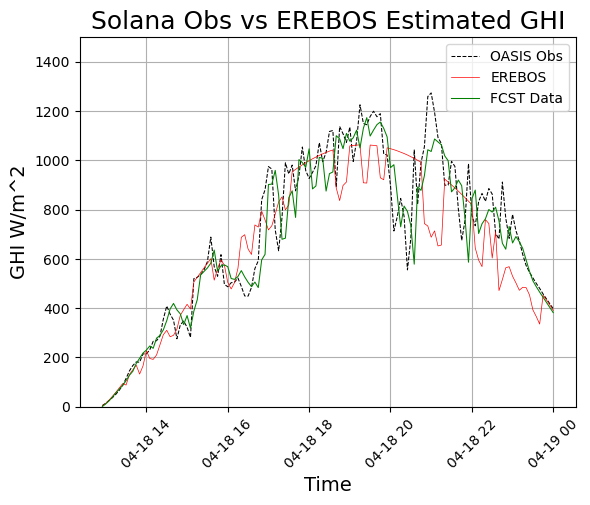

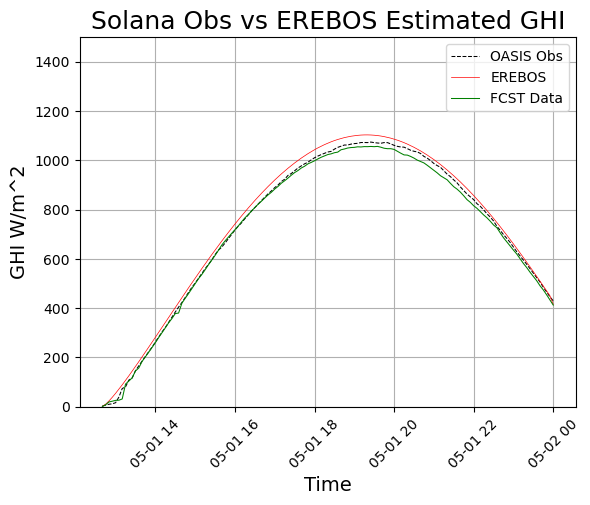

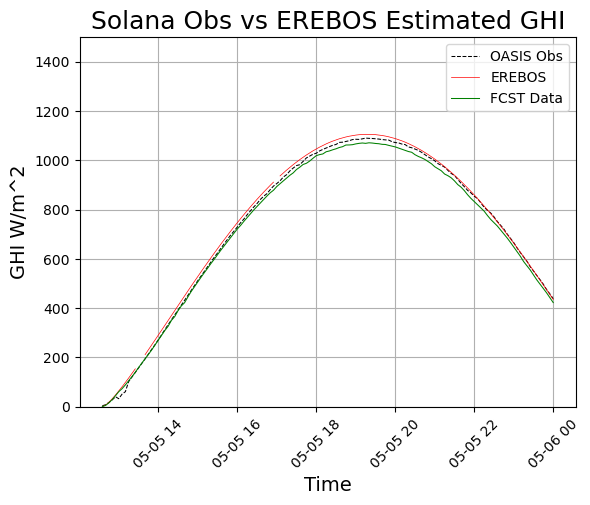

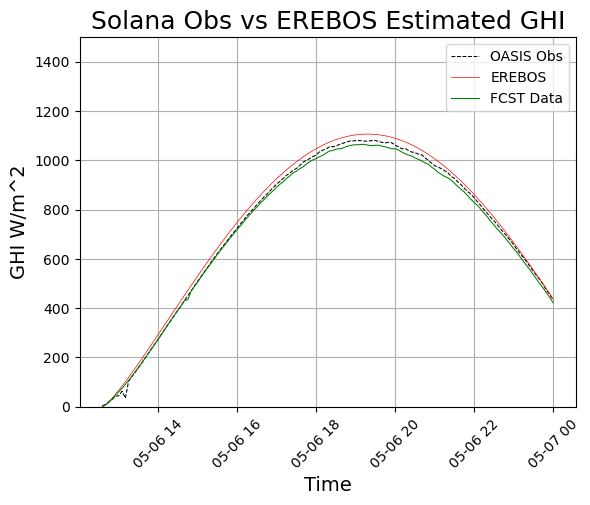

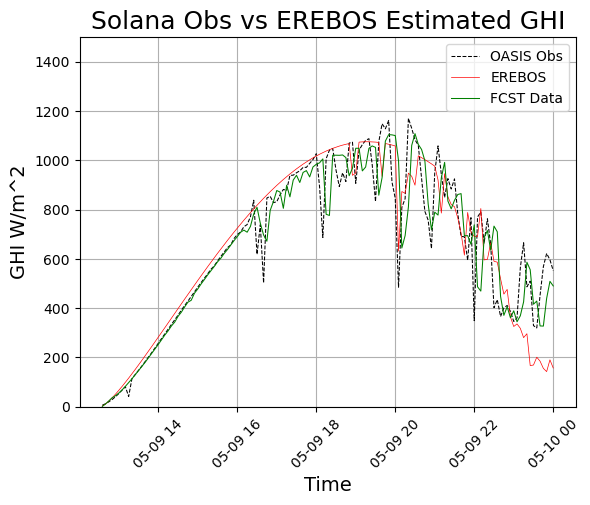

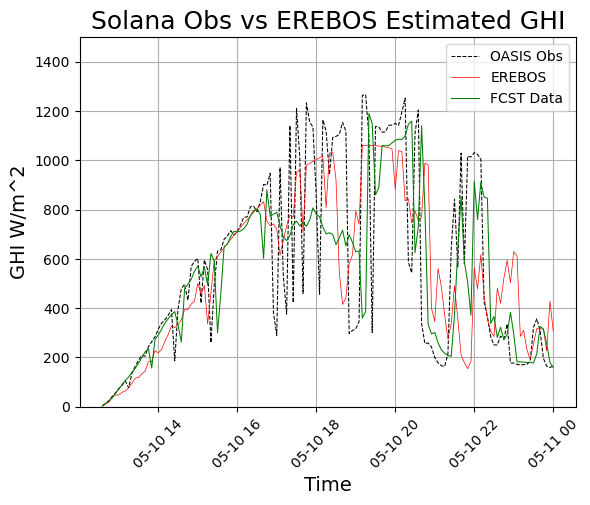

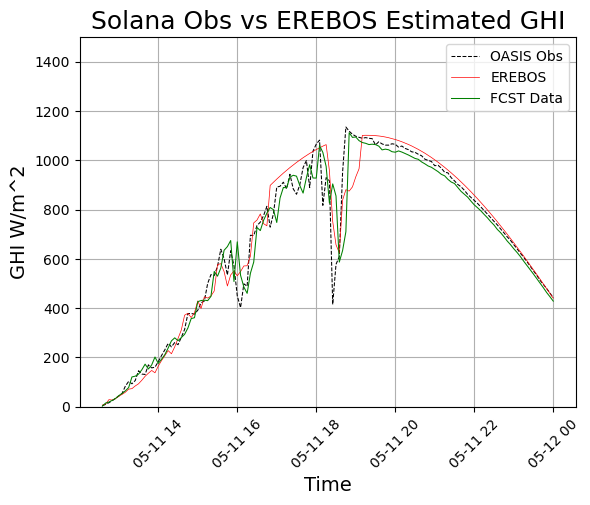

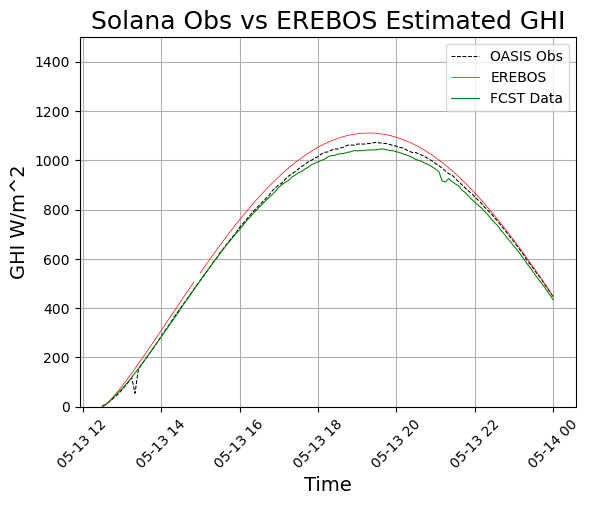

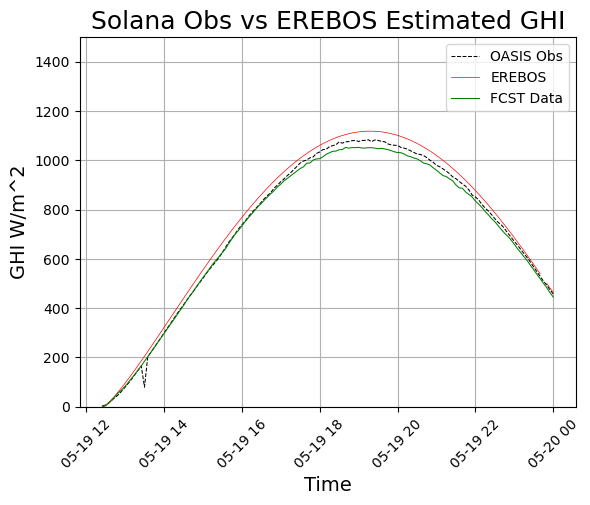

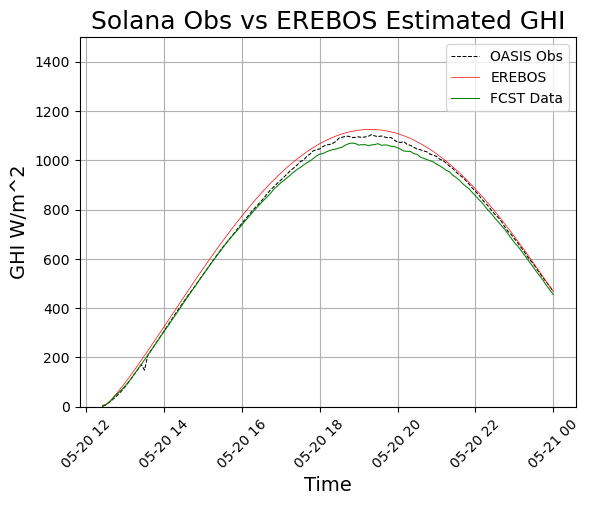

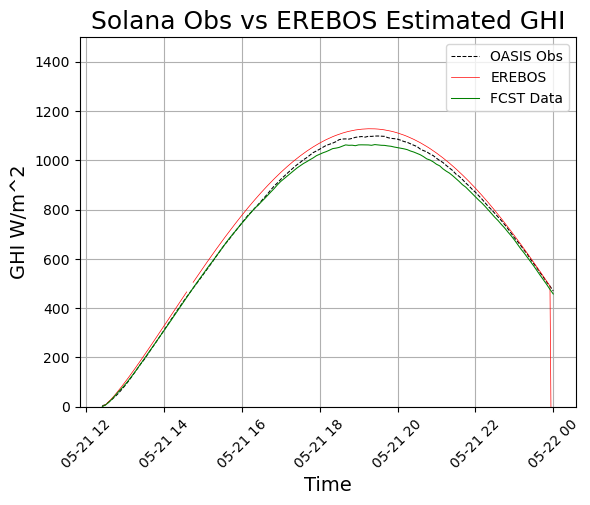

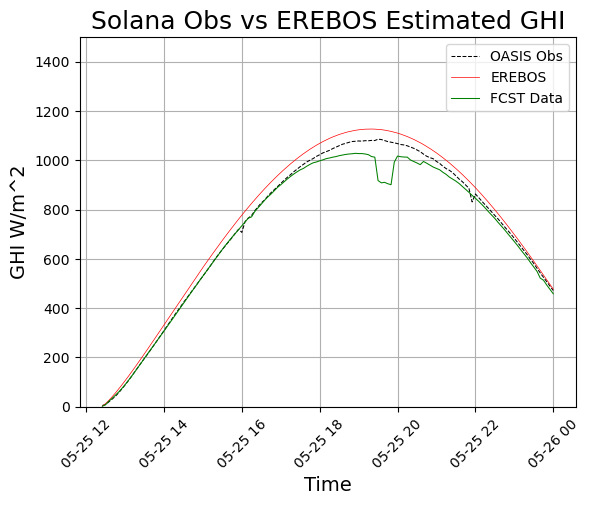

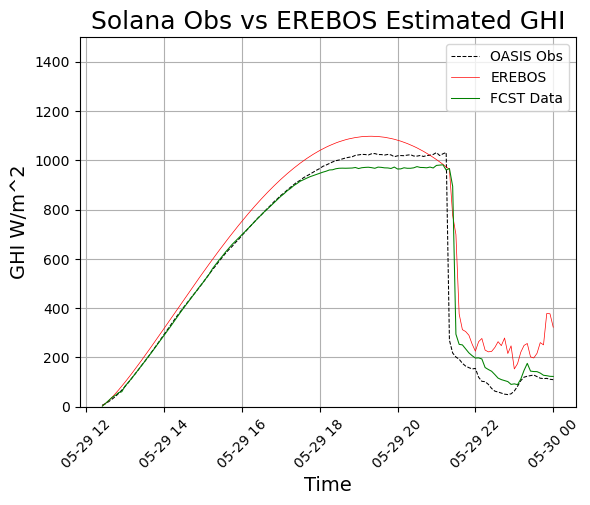

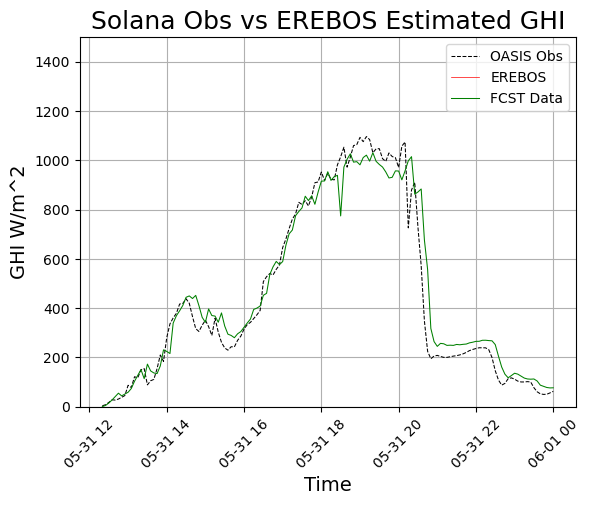

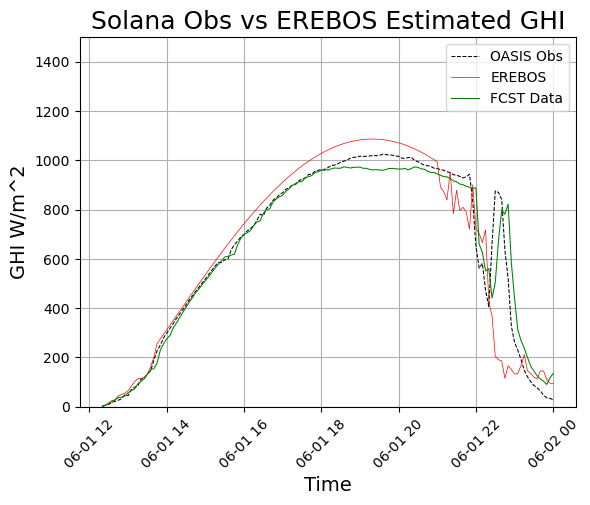

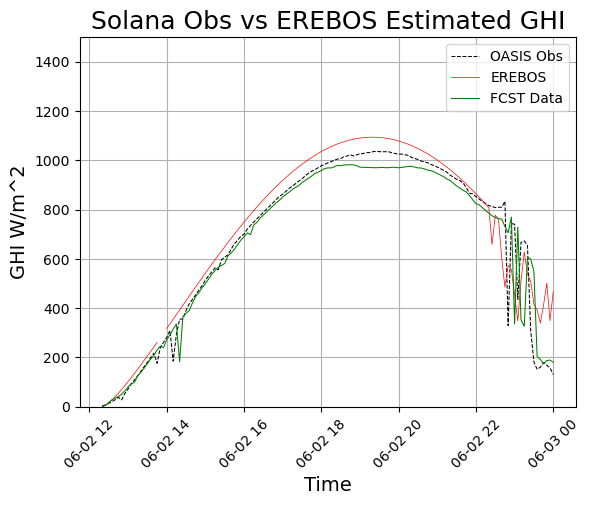

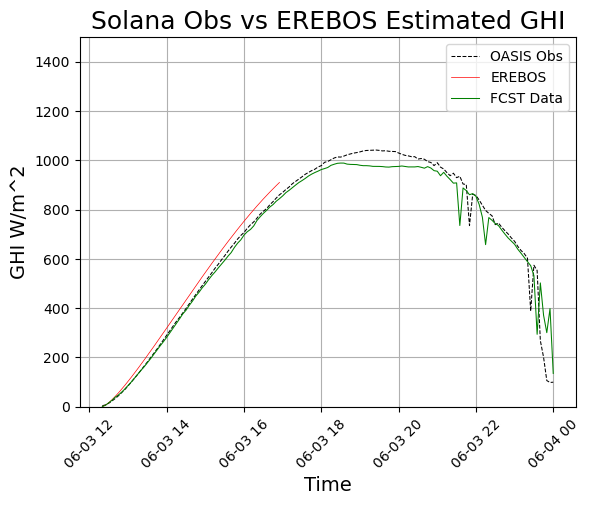

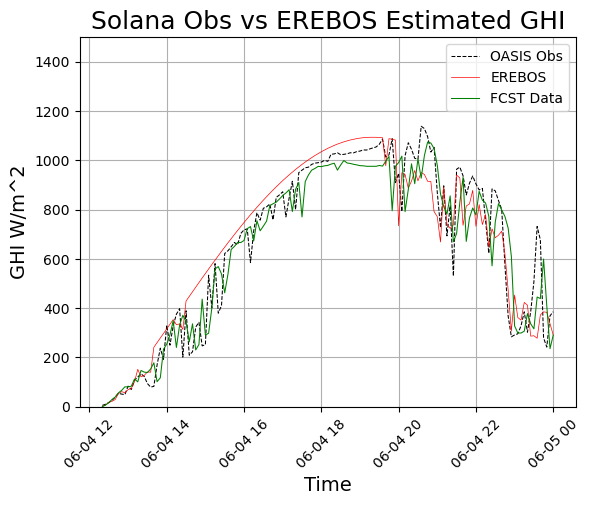

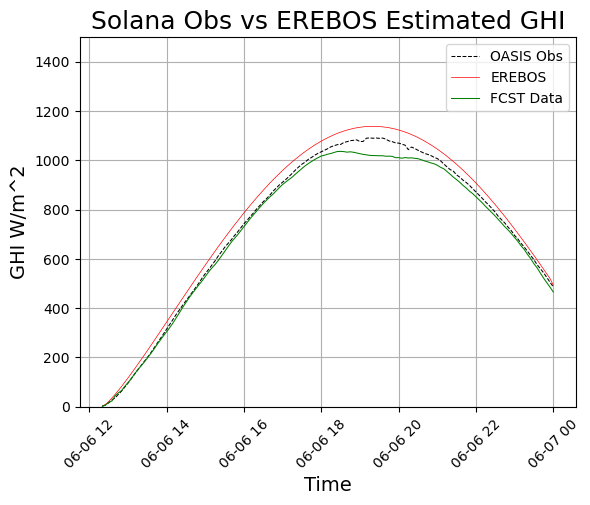

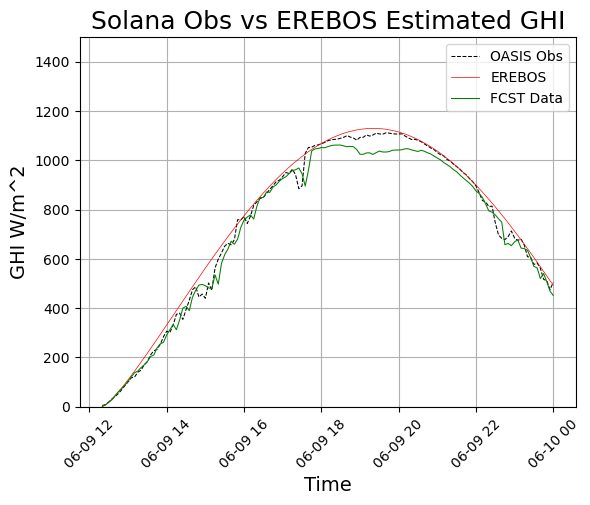

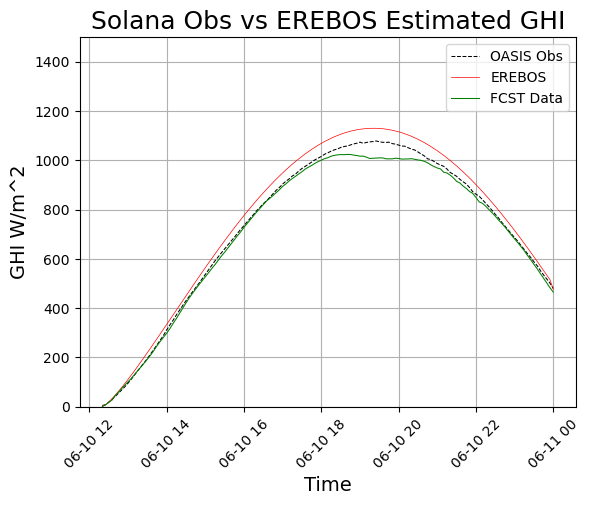

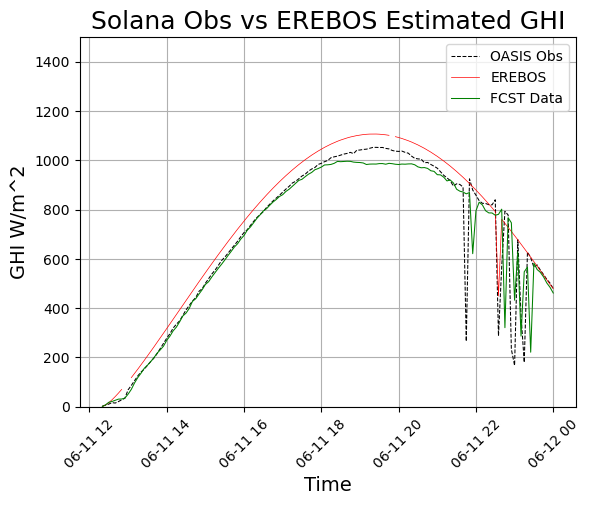

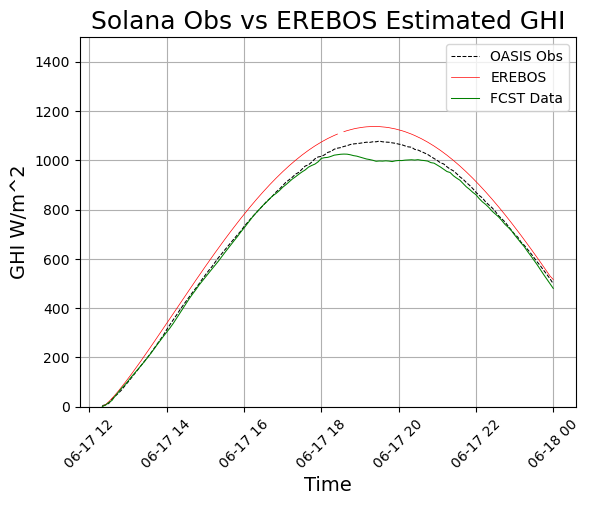

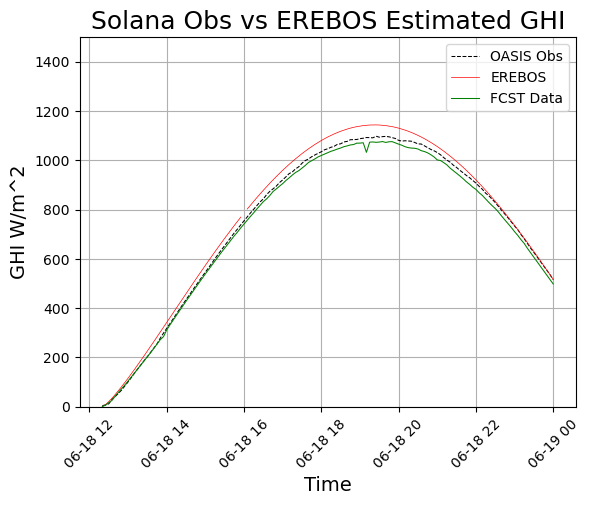

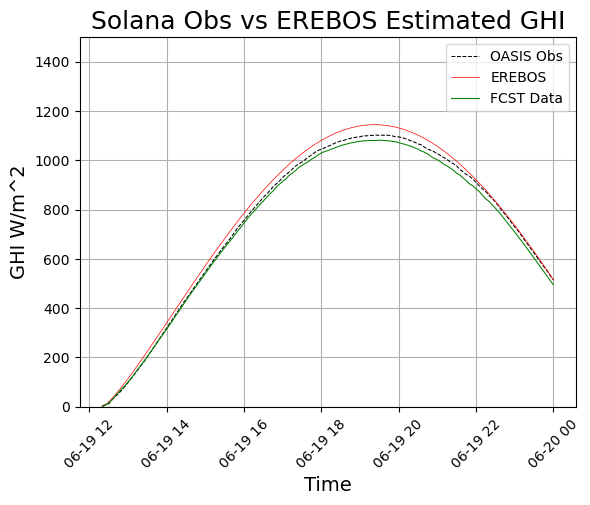

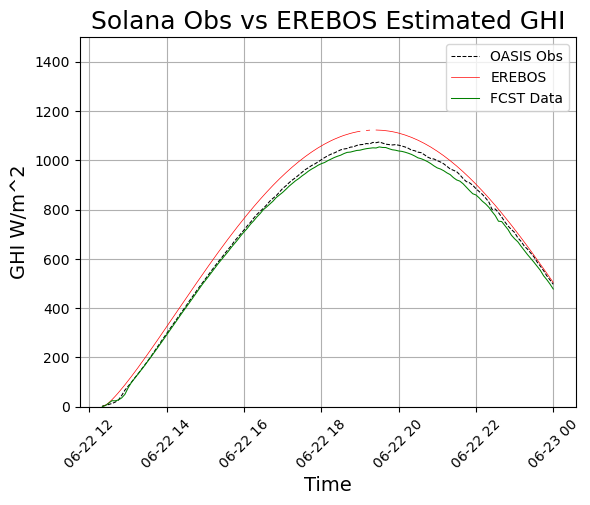

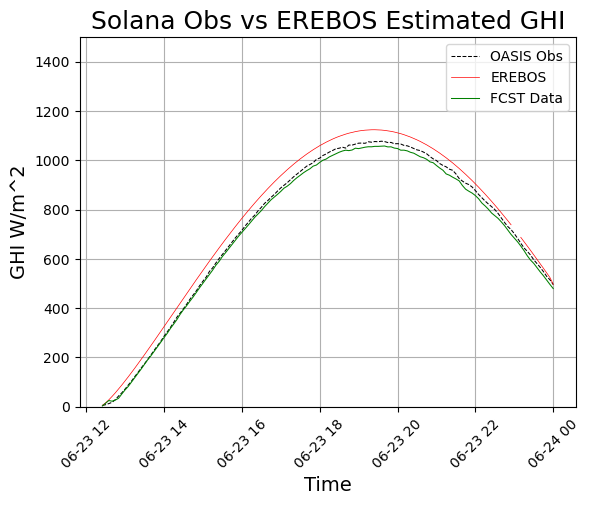

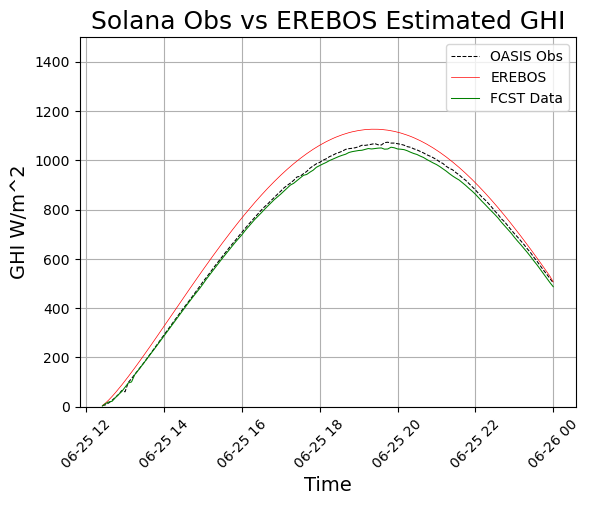

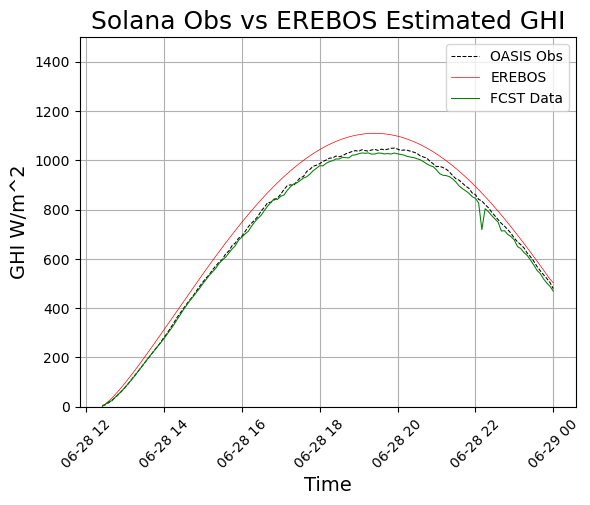

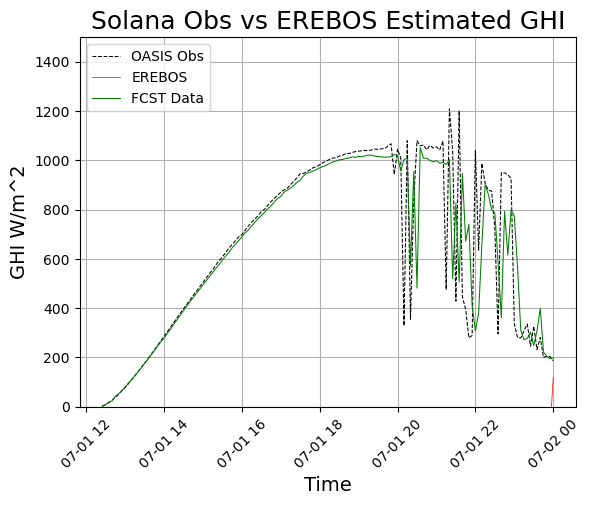

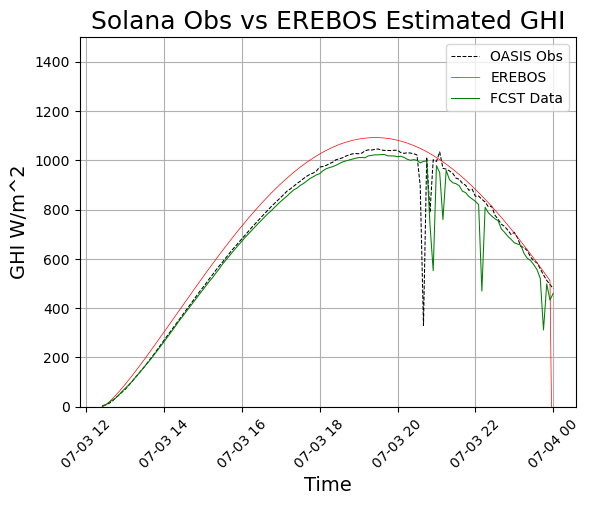

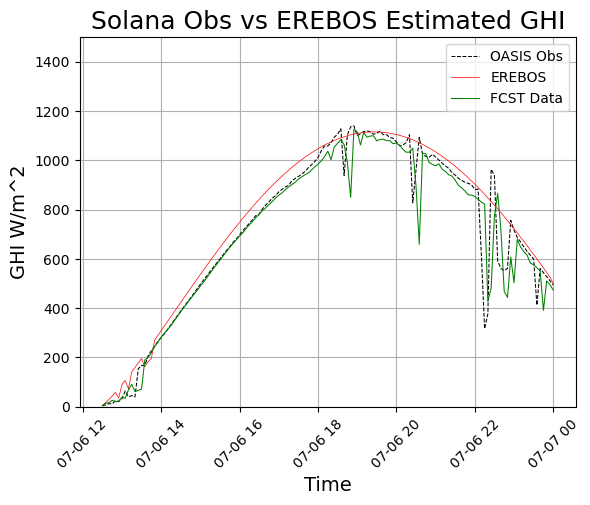

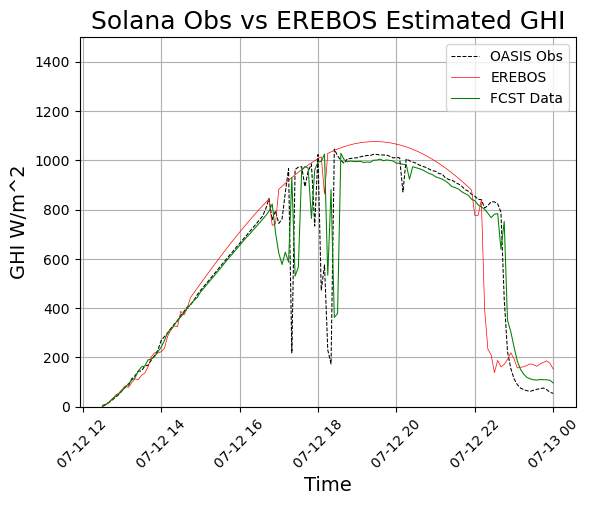

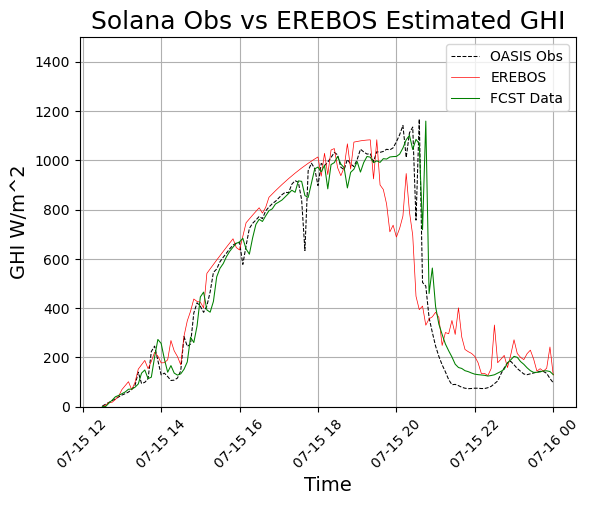

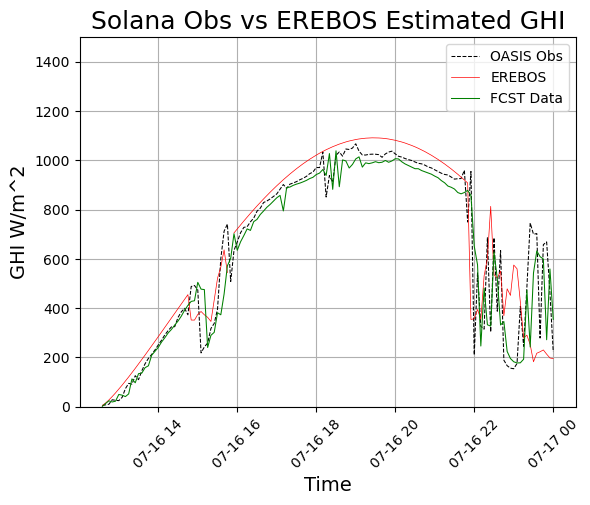

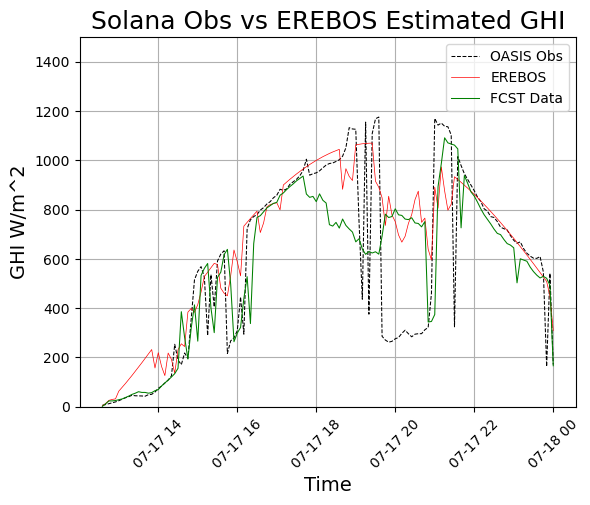

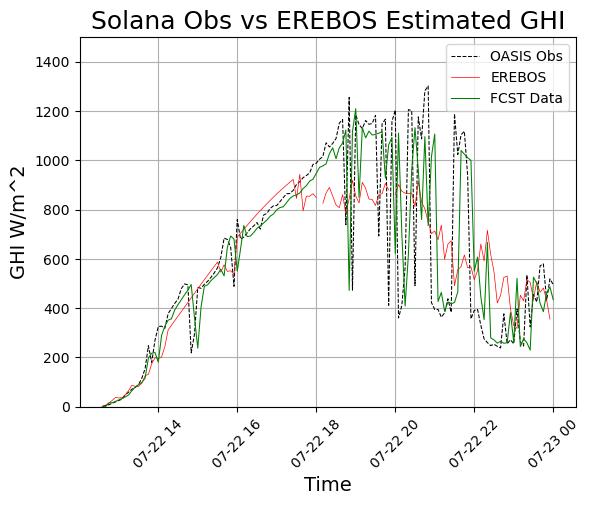

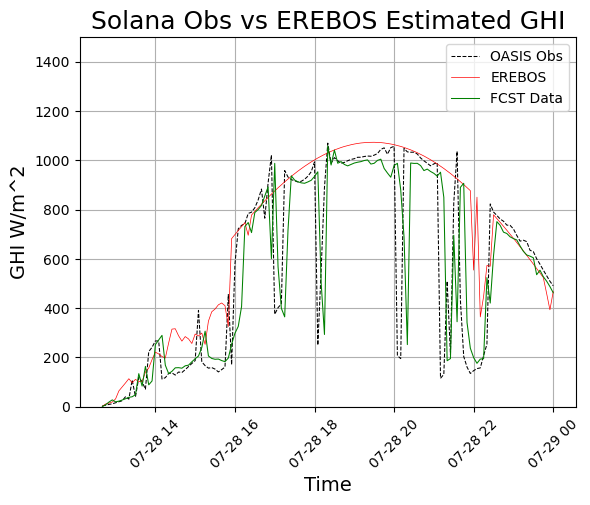

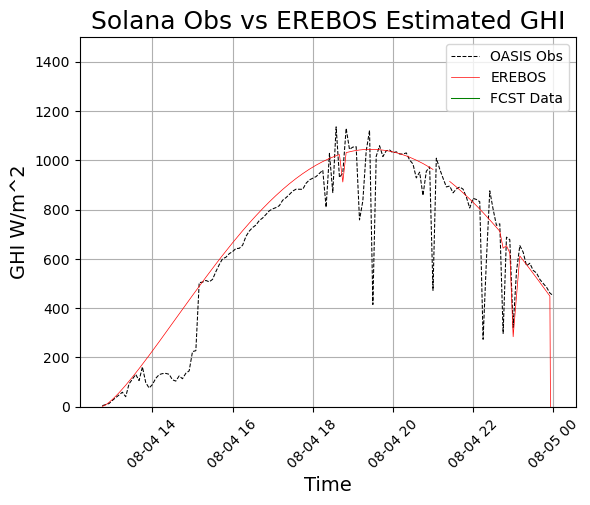

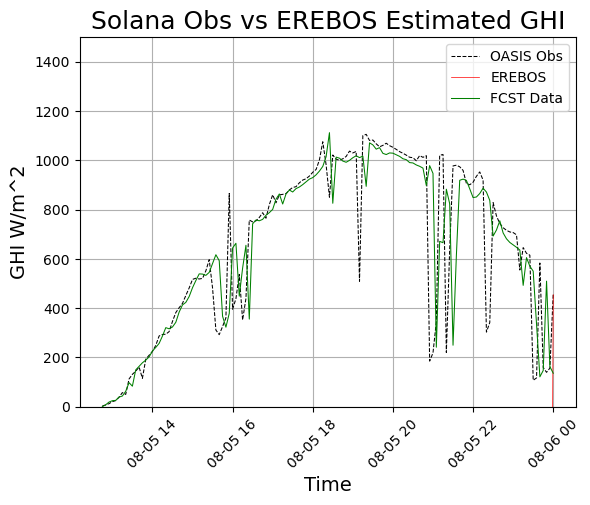

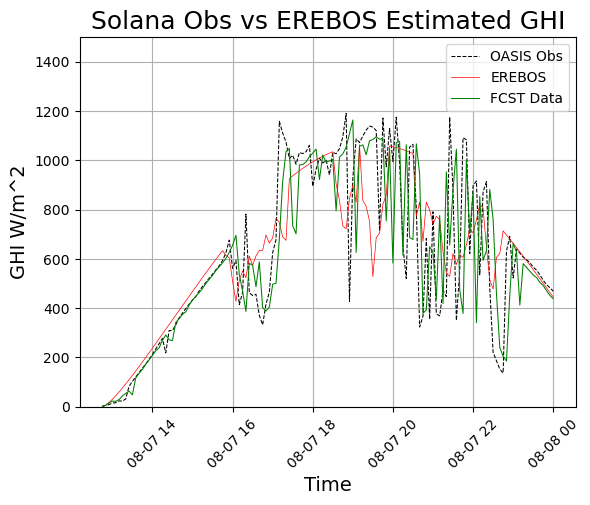

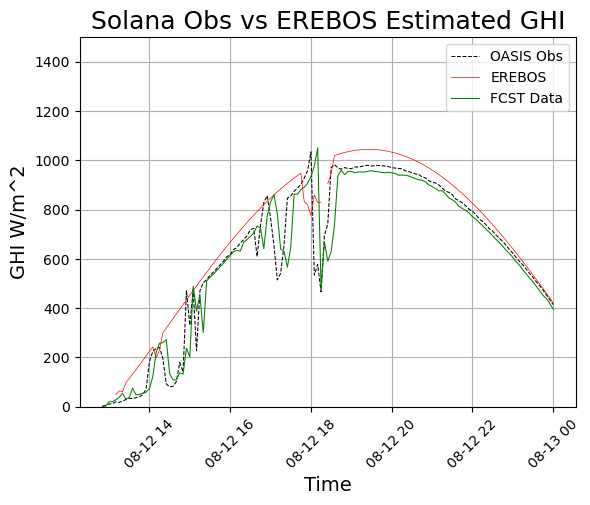

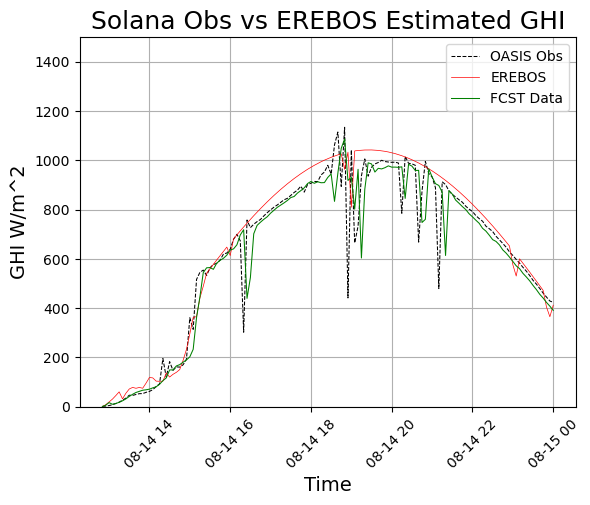

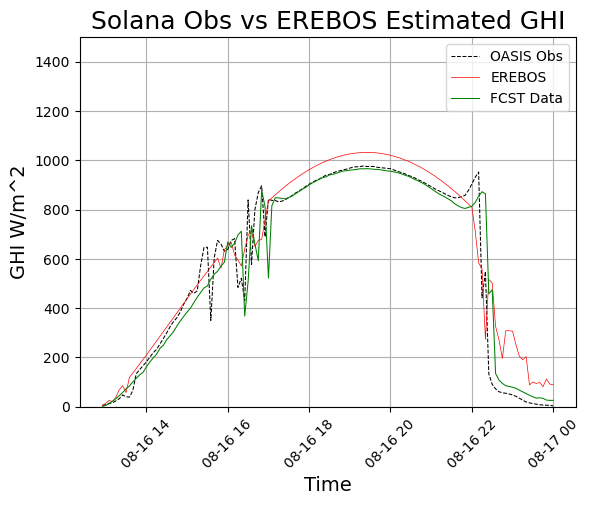

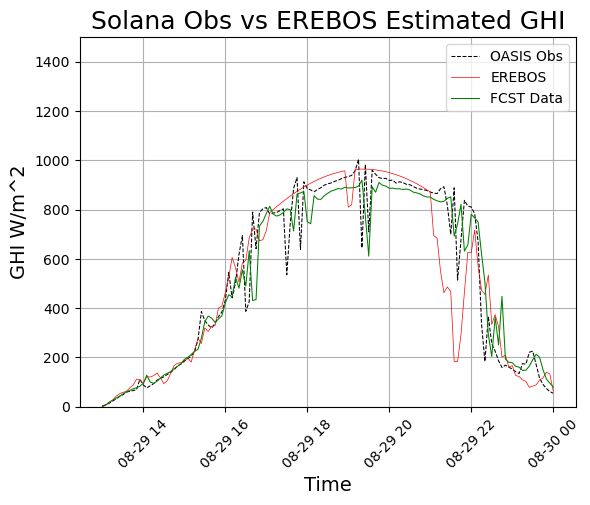

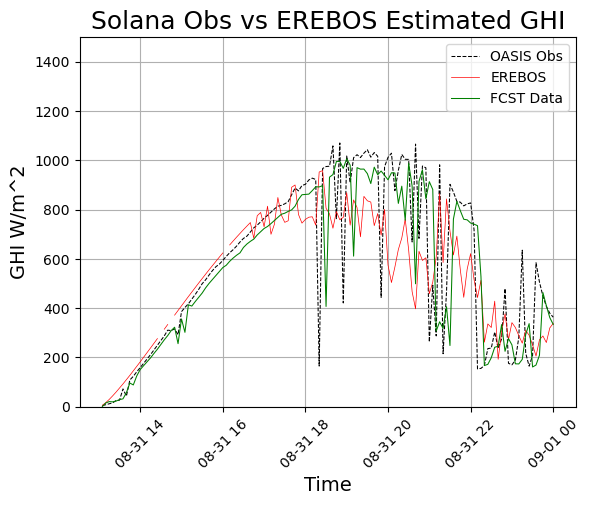

In [64]:
for i in range(len(subset_ind)):
    year = dates[subset_ind[i]].year
    month = dates[subset_ind[i]].month
    day = dates[subset_ind[i]].day
    plot_func(year=year,month=month,day=day)

